<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/4.%20Public%20Health%20and%20Safety/Medical%20Insurance%20Prediction/Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Content
1. [Project Setup](#1)
    - 1.1 [Connecting to Kaggle](#1.1)
    - 1.2 [Downloading Dataset From Kaggle](#1.2)
    - 1.3 [Import Libraries](#1.3)
    - 1.4 [Import Dataset](#1.3)

2. [Data Exploration](#2)
    - 2.1 [Getting To Know The Variables](#2.1)
    - 2.2 [Check Data Types](#2.2)
    - 2.3 [Statistical Summyer](#2.3)
    - 2.4 [Checking Missing Values](#2.4)
3. [Exploratory Data Analysis](#3)
    - 3.1 [Grouping DataFrame By Categorical Variables](#3.1)
    - 3.2 [Countplot](#3.2)
    - 3.3 [Distribution](#3.3)
4. [Data Preprocessing](#4)
    - 4.1 [Encoding Categorical Data](#4.1)
    - 4.2 [Check Outliers](#4.2)
    - 4.3 [Log Tranformation On Target Variable](#4.3)
5. [Correlation Bar & Heatmap]
    - 5.1 [Correlation Bar](#5.1)
    - 5.2 [Correlation Heatmap](#5.2)
6. [Preparing For Modelling](#6)
    - 6.1 [Splitting Dependent/Independent Features](#6.1)
    - 6.2 [6.2 Splitting Train/Test Sets](#6.2)
7. [Modelling](#7)
    - 7.1 [Multiple Linear Regression](#7.1)
        - 7.1.1 [Multiple Linear Regression Accuracy](#7.1.1)
    - 7.2 [RandomForest Regression](#7.2)
        - 7.2.1 [RandomForest Accuracy](#7.2.1)
    - 7.3 [XGBoost Regressor](#7.3)
        - 7.3.1 [XGBoost Regressor Accuracy](#7.3.1)
        - 7.3.2 [XGBoost Hyperparameter Tunning](#7.3.2)
        - 7.3.3 [XGBoost Regression Tuned](#7.3.3)



[Dataset Link](https://www.kaggle.com/datasets/mirichoi0218/insurance)

# 1. Project Setup

## 1.2 Connecting to Kaggle <a id=1.1></a>

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## 1.2 Downloading Dataset From Kaggle <a id=1.2></a>

In [3]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 28.2MB/s]


In [4]:
!unzip /content/insurance.zip

Archive:  /content/insurance.zip
  inflating: insurance.csv           


## 1.3 Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.4 Import Dataset <a id=1.4></a>

In [66]:
df = pd.read_csv('insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# 2. Data Exploration <a id=2></a>

In [67]:
df.shape

(1338, 7)

## 2.1 Getting to Know The Variables <a id=2.1></a>

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

1. **age**:
   - **Description**: The age of the individual.
   - **Type**: int64 (integer)
   - **Example**: 25, 45, 60

2. **sex**:
   - **Description**: The gender of the individual.
   - **Type**: object (categorical)
   - **Example**: "male", "female"

3. **bmi**:
   - **Description**: Body Mass Index, a measure of body fat based on height and weight.
   - **Type**: float64 (floating-point number)
   - **Example**: 22.4, 30.1, 18.5

4. **children**:
   - **Description**: The number of children/dependents covered by the insurance.
   - **Type**: int64 (integer)
   - **Example**: 0, 2, 3

5. **smoker**:
   - **Description**: Indicates whether the individual is a smoker.
   - **Type**: object (categorical)
   - **Example**: "yes", "no"

6. **region**:
   - **Description**: The region where the individual resides.
   - **Type**: object (categorical)
   - **Example**: "northeast", "southeast", "southwest", "northwest"

7. **charges**:
   - **Description**: The medical insurance charges billed to the individual.
   - **Type**: float64 (floating-point number)
   - **Example**: 12345.67, 7890.12, 4567.89

## 2.2 Check Data Types <a id=2.2></a>

In [10]:
# Object variables
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
pd.DataFrame(df['sex'].value_counts())

,count
sex,
male,676
female,662


In [13]:
pd.DataFrame(df['smoker'].value_counts())

,count
smoker,
no,1064
yes,274


In [14]:
pd.DataFrame(df['region'].value_counts())

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [19]:
# Numeric Variables
df.select_dtypes(include='number').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

## 2.3 Statistical Summary <a id=2.3></a>

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Statistical Summary Analysis**:

1. **Age**:
   **Analysis**: The ages of the individuals range from 18 to 64 years, with an average age of approximately 39 years. The standard deviation of 14 years indicates a fairly wide distribution of ages around the mean. The quartile values show a balanced spread, with the median age being exactly the same as the mean.

2. **BMI (Body Mass Index)**:
   **Analysis**: BMI values range from 15.96 to 53.13, with an average BMI of approximately 30.66. The standard deviation of around 6 indicates moderate variation in BMI among individuals. The median and quartile values suggest that most individuals have a BMI in the range of 26.296 to 34.694, indicating a tendency towards higher BMI values in the sample.

3. **Children**:
   **Analysis**: The number of children ranges from 0 to 5, with an average of approximately 1.1 children per individual. The standard deviation of 1.205 indicates some variability, with many individuals having 0 to 2 children as shown by the quartile values.

4. **Charges**:
   **Analysis**: Medical insurance charges range from 1121.87 to 63770.43 units, with an average charge of approximately 13270.42 units. The high standard deviation of 12110.01 units indicates significant variability in charges. The quartile values show that half of the individuals incur charges between 4740.287 and 16639.913 units, with a median charge of 9382.033 units. The high maximum value suggests the presence of outliers or high-cost cases.

**Conclusion**:
- The **age** distribution is centered around 39 years with a reasonable spread, indicating a diverse age group.
- The **BMI** values indicate a tendency towards higher BMI, with the majority of the population falling within the overweight to obese range.
- The **number of children** per individual shows a skew towards fewer children, with many having none or one child.
- The **medical insurance charges** exhibit significant variability, with a median cost much lower than the mean, indicating a right-skewed distribution with some individuals incurring very high charges.

## 2.4 Checking Missing Values <a id=2.4></a>

In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df.isnull().values.any()

False

# 3. Exploratory Data Analysis

## 3.1 Grouping DataFrame By Categorical Variables <a id=3.1></a>

In [70]:
df.groupby('sex')[['age',  'bmi', 'children', 'charges']].mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [71]:
df.groupby('region')[['age',  'bmi', 'children', 'charges']].mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [72]:
df.groupby('smoker')[['age',  'bmi', 'children', 'charges']].mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


## 3.2 Coutplot <a id=3.2></a>

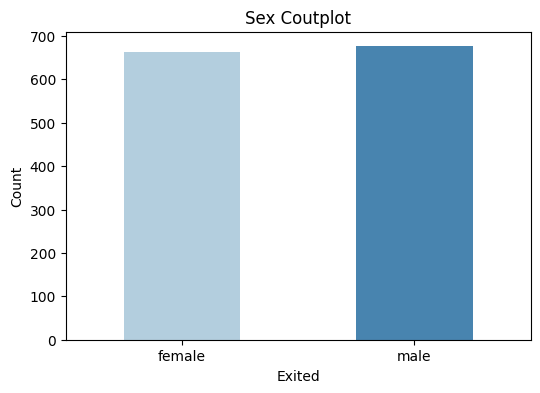

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sex'], palette='Blues', width=0.5)
plt.title("Sex Coutplot", fontsize=12)
plt.xlabel("Sex", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

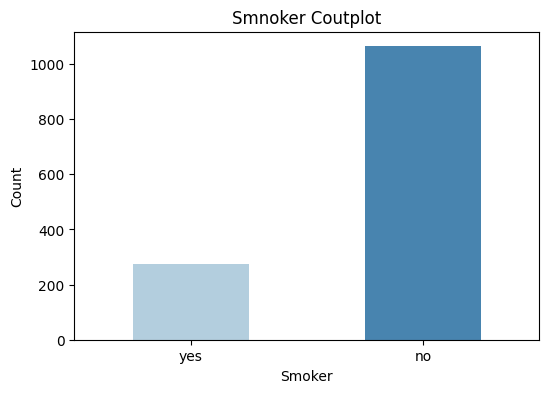

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['smoker'], palette='Blues', width=0.5)
plt.title("Smnoker Coutplot", fontsize=12)
plt.xlabel("Smoker", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

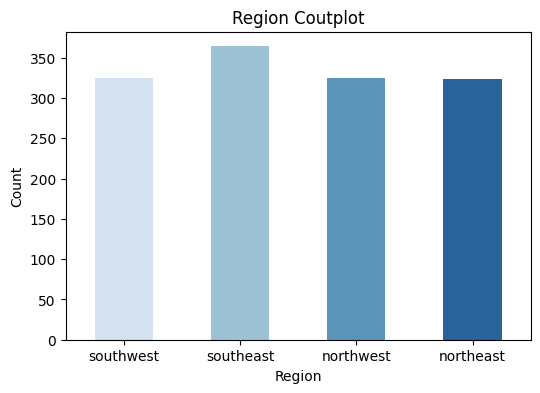

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['region'], palette='Blues', width=0.5)
plt.title("Region Coutplot", fontsize=12)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

## 3.3 Distribution <a id=3.3></a>

In [52]:
def dist(col):
    plt.figure(figsize=(5,5))
    sns.set_style('darkgrid')
    sns.distplot(df[col], color='darkblue', bins='auto')
    plt.title(f"{col}'s Distribution")
    plt.show()

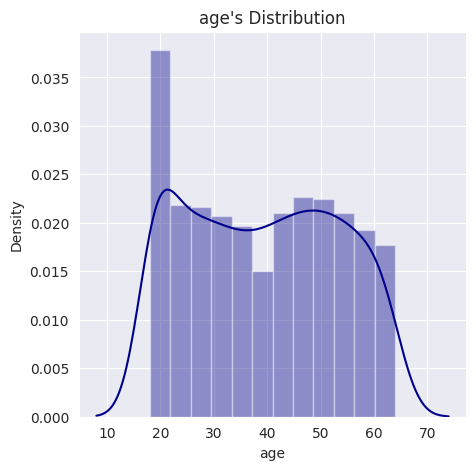

In [53]:
dist('age')

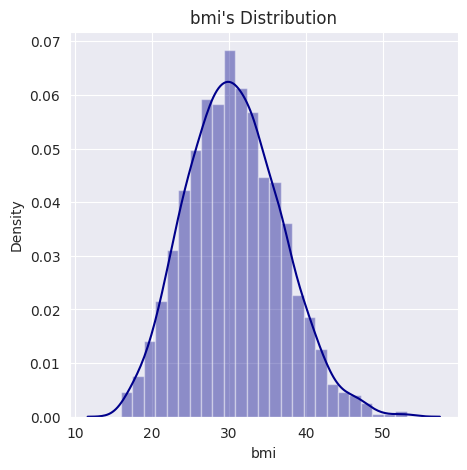

In [54]:
dist('bmi')

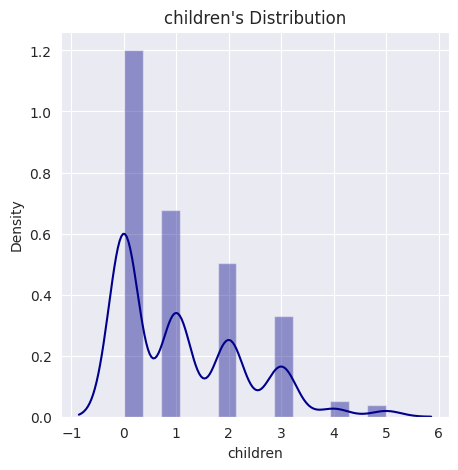

In [55]:
dist('children')

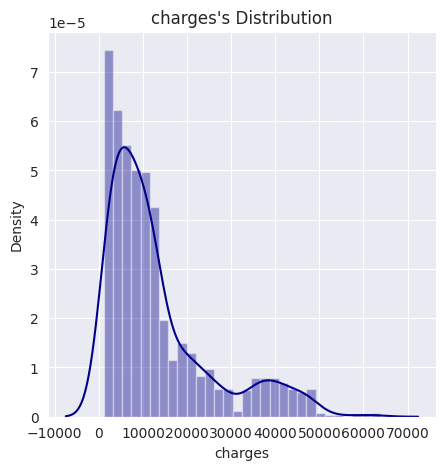

In [56]:
dist('charges')

# 4. Data Preprocessing <a id=4></a>

## 4.1 Encoding Categorical Data <a id=4.1></a>

In [75]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

encoded_cols = encoder.fit_transform(df[['sex', 'smoker', 'region']])
encoded_cols = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))
encoded_cols

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,1.0


In [76]:
df_encoded = pd.concat([df, encoded_cols], axis=1)
df_encoded.drop(['sex', 'smoker','region'], axis=1, inplace=True)
df_encoded.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0.0,1.0,0.0,0.0,1.0
1,18,33.77,1,1725.5523,1.0,0.0,0.0,1.0,0.0


In [79]:
df_encoded.shape

(1338, 9)

## 4.2 Check Outliers <a id=4.2></a>

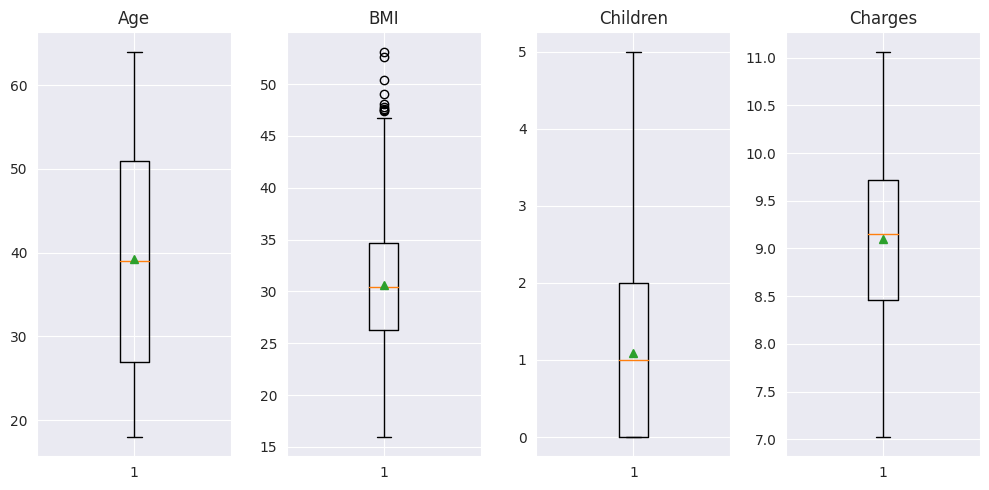

In [156]:
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(10, 5))

ax1.boxplot(df_encoded["age"], showmeans=True)
ax1.set_title("Age")

ax2.boxplot(df_encoded["bmi"], showmeans=True)
ax2.set_title("BMI")

ax3.boxplot(df_encoded["children"], showmeans=True)
ax3.set_title("Children")

ax4.boxplot(df_encoded["charges"], showmeans=True)
ax4.set_title("Charges")

plt.tight_layout()
plt.show()

__There huge outliers in target variable (charges). So in terms of outliers handling i will use logarithm for decrease outliers in target varibales__

## 4.3 Log Tranformation On Target Variable <a id=4.3></a>

In [155]:
df_encoded['charges'] = np.log1p(df_encoded['charges'])

# 5. Correlation Bar & Heatmap <a id=5></a>

## 5.1 Correlation Bar <a id=5.1></a>

<Axes: title={'center': 'Correlation Bar'}>

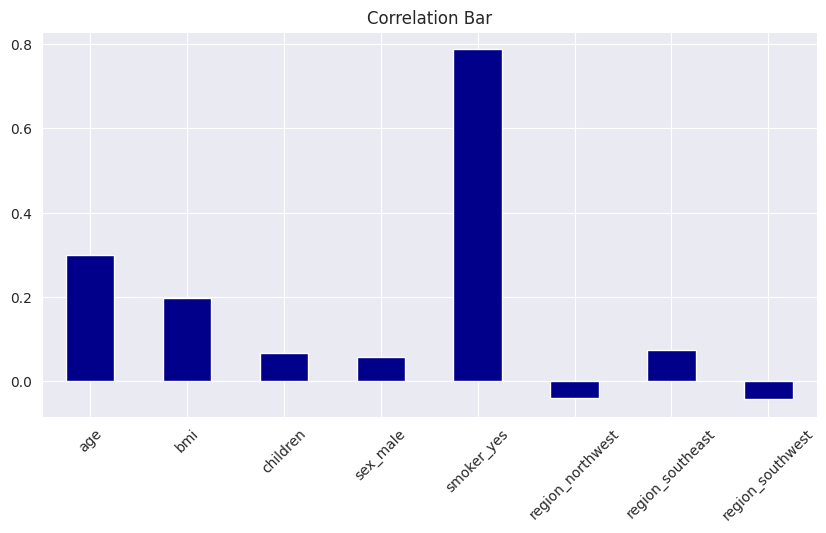

In [82]:
df2 = df_encoded.drop('charges', axis=1)

df2.corrwith(df_encoded['charges']).plot.bar(
    figsize=(10, 5),
    title='Correlation Bar',
    rot=45,
    color='darkblue'
)

## 5.2 Correlation Heatmap <a id=5.2></a>

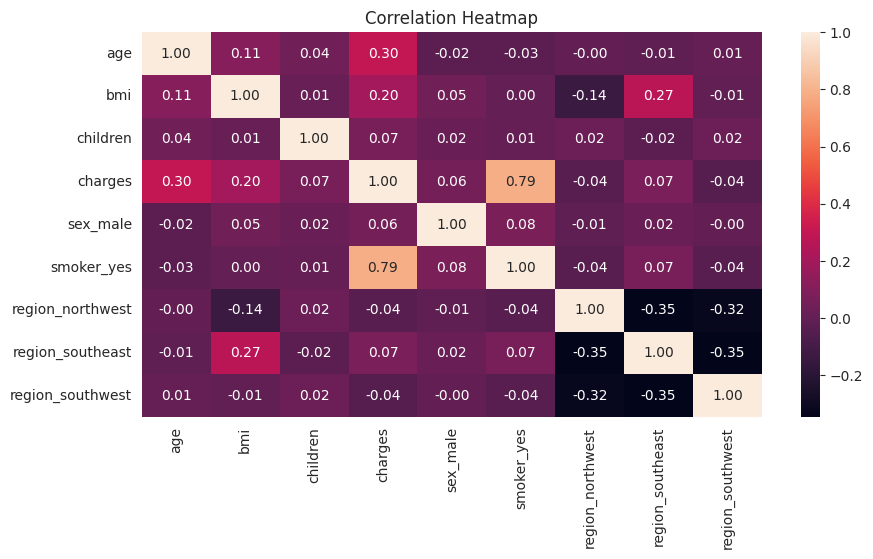

In [85]:
df_corr = df_encoded.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 6. Preparing For Modelling <a id=6></a>

## 6.1 Splitting Dependent/Independent Features <a id=6.1></a>

In [157]:
X = df_encoded.drop('charges', axis=1).values
y = df_encoded['charges'].values

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (1338, 8)
y Shape:  (1338,)


In [158]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,7.453882,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,8.400763,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,9.998137,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,8.260455,1.0,0.0,1.0,0.0,0.0


## 6.2 Splitting Train/Test Sets <a id=6.2></a>

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check Shape of Train & Test sets
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1070, 8)
X_test Shape:  (268, 8)
y_train Shape:  (1070,)
y_test Shape:  (268,)


# 7. Modelling

## 7.1 Multiple Linear Regression <a id=7.1></a>

In [184]:
from sklearn.linear_model import LinearRegression

# Creating LinearRegression Instance
regressor_lr = LinearRegression()
# Fitting Model
regressor_lr.fit(X_train, y_train)
# Prediction on test data
y_pred = regressor_lr.predict(X_test)

### 7.1.1 Multiple Linear Regression Accuracy

In [185]:
from sklearn.metrics import r2_score, mean_squared_error

print("Multiple Linear Regression Accuracy: ", r2_score(y_test, y_pred))
print("Multiple Linear Regression MSE: ", mean_squared_error(y_test, y_pred))

Multiple Linear Regression Accuracy:  -126574.19868632974
Multiple Linear Regression MSE:  106261.36503082306


## 7.2 RandomForest Regression <a id=7.2></a>

In [163]:
from sklearn.ensemble import RandomForestRegressor

# Creating RandomForestRegressor Instance
regressor_rf = RandomForestRegressor()
# Fitting Model
regressor_rf.fit(X_train, y_train)
# Prediction on test data
y_pred = regressor_rf.predict(X_test)

### 7.2.1 RandomForest Regression Accuracy <a id=7.2.1></a>

In [164]:
print("RandomForest Regression Accuracy: ", r2_score(y_test, y_pred))
print("RandomForest Regression MSE: ", mean_squared_error(y_test, y_pred))

RandomForest Regression Accuracy:  0.8736846422180776
RandomForest Regression MSE:  0.10604322554157293


## 7.3 XGBoost Regressor <a id=7.3></a>

In [165]:
from xgboost import XGBRegressor

# Creating XGBRegressor Instance
regressor_xgb = XGBRegressor()
# Fitting Model
regressor_xgb.fit(X_train, y_train)
# Prediction on test data
y_pred = regressor_xgb.predict(X_test)

### 7.3.1 XGBoost Regressor Accuracy <a id=7.3.1></a>

In [166]:
print("XGBRegressor Accuracy: ", r2_score(y_test, y_pred))
print("XGBRegressor MSE: ", mean_squared_error(y_test, y_pred))

XGBRegressor Accuracy:  0.8476704020523278
XGBRegressor MSE:  0.12788248551463105


### 7.3.2 XGBoost Hyperparameter Tunning <a id=7.3.2></a>

In [168]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [1, 1.5, 2, 3, 4]
}

# Create RandomizedSearchCV instance
xgb = XGBRegressor()
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,  # number of random combinations to try
    scoring='r2',
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the random search
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [1, 1.5, 2, 3, 4],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

### 7.3.3 XGBoost Regression Tuned <a id=7.3.3></a>

In [169]:
# Best parameters and evaluation
print("Best Parameters: ", random_search.best_params_)
best_xgb = random_search.best_estimator_

# Prediction on test data
y_pred = best_xgb.predict(X_test)

# Evaluation
print("XGBRegressor Accuracy: ", r2_score(y_test, y_pred))
print("XGBRegressor MSE: ", mean_squared_error(y_test, y_pred))

Best Parameters:  {'subsample': 0.9, 'reg_lambda': 4, 'reg_alpha': 1, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.5, 'colsample_bytree': 0.9}
XGBRegressor Accuracy:  0.8731936683539856
XGBRegressor MSE:  0.10645540386350598
